### Simple Linear Regression
1. Read the dataset
2. EDA, FE
3. Divide dataset into independent and dependent features
4. Further divide the dataset into train and test
5. Standard scaling on the test and train data
6. Train Model


In [55]:
# import dataset
# !kaggle datasets download -d burnoutminer/heights-and-weights-dataset

In [56]:
# unzip file
# !unzip 'heights-and-weights-dataset.zip'

In [57]:
# lets make pd dataframe
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv('SOCR-HeightWeight.csv') 

In [58]:
# Do EDA
df.head()

Index  Height(Inches)  Weight(Pounds)
0      1        65.78331        112.9925
1      2        71.51521        136.4873
2      3        69.39874        153.0269
3      4        68.21660        142.3354
4      5        67.78781        144.2971

In [59]:
df = df.rename(columns={'Height(Inches)':'Height',
                        'Weight(Pounds)':'Weight'}) 

In [60]:
df.head()

Index    Height    Weight
0      1  65.78331  112.9925
1      2  71.51521  136.4873
2      3  69.39874  153.0269
3      4  68.21660  142.3354
4      5  67.78781  144.2971

In [61]:
df.duplicated().sum()

0

In [62]:
df.isna().sum()

Index     0
Height    0
Weight    0
dtype: int64

In [63]:
df.dtypes

Index       int64
Height    float64
Weight    float64
dtype: object

Text(0.5, 1.0, 'Weight Distribution')

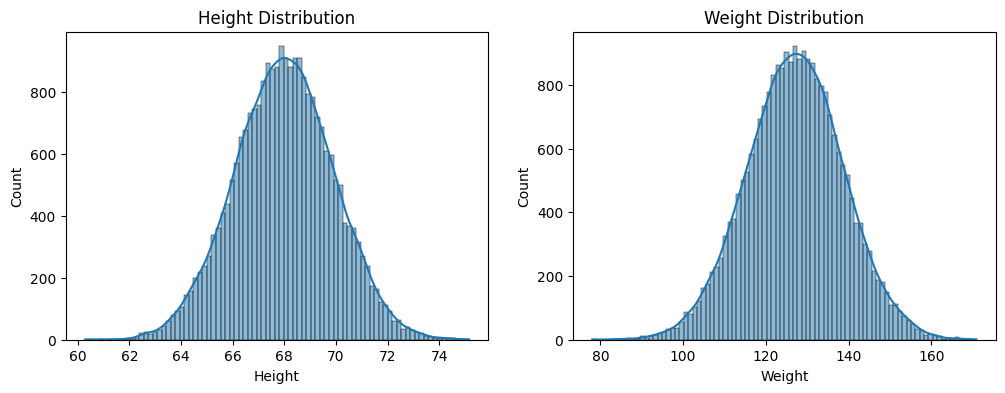

In [64]:
import seaborn as sbn

fig, axes = plt.subplots(1,2,figsize =(12,4))

sbn.histplot(df['Height'],kde = True,ax=axes[0])
axes[0].set_title("Height Distribution")

sbn.histplot(df['Weight'],kde = True,ax=axes[1])
axes[1].set_title("Weight Distribution")

<Axes: xlabel='Height', ylabel='Weight'>

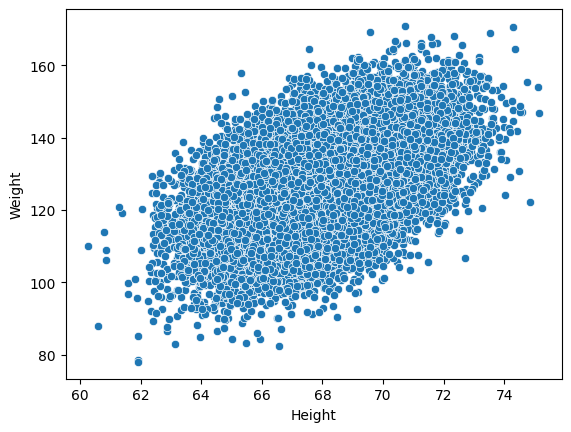

In [65]:
sbn.scatterplot(x= df['Height'],y = df['Weight'],data= df)

In [66]:
df.describe()

Index        Height        Weight
count  25000.000000  25000.000000  25000.000000
mean   12500.500000     67.993114    127.079421
std     7217.022701      1.901679     11.660898
min        1.000000     60.278360     78.014760
25%     6250.750000     66.704397    119.308675
50%    12500.500000     67.995700    127.157750
75%    18750.250000     69.272958    134.892850
max    25000.000000     75.152800    170.924000

<Axes: >

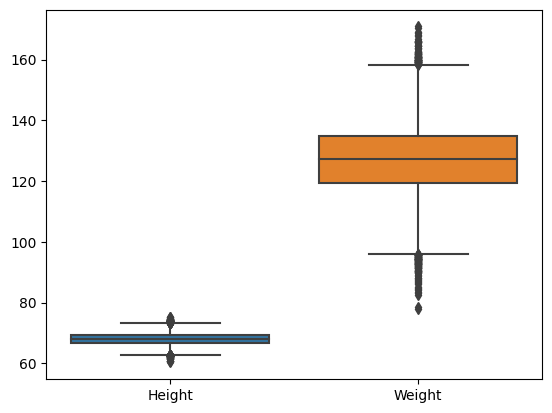

In [67]:
# treating outliers

sbn.boxplot(df[['Height','Weight']])

<Axes: >

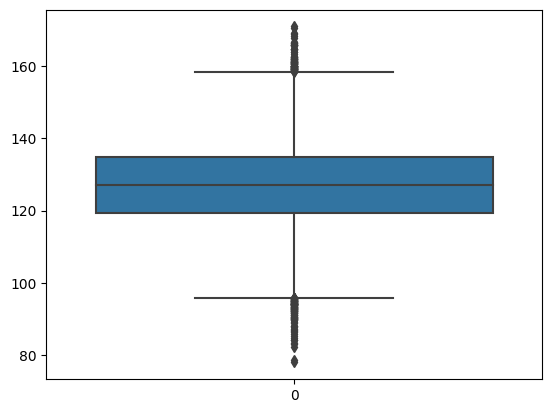

In [68]:
sbn.boxplot(df['Weight'])

In [69]:
# remove outliers

# for height
q1,q2,q3 = np.quantile(df['Height'],[0.25,0.50,0.75])

In [70]:
iqr = q3-q1
low_fence = q1-1.5*(iqr)
high_fence = q3+1.5*(iqr)

In [71]:
low_fence,high_fence

(62.85155749999999, 73.1257975)

In [72]:
# outliers in height
outlier_l_h = df[df['Height']<= low_fence]
outlier_h_h = df[df['Height']>= high_fence]


In [73]:
outlier_l_h

Index    Height     Weight
412      413  62.01666  109.08480
1133    1134  62.75039  114.49000
1244    1245  62.64242  100.19820
2186    2187  62.60611  129.76000
2237    2238  62.78196  119.84700
...      ...       ...        ...
22778  22779  62.48689  111.81650
22945  22946  61.92639   78.01476
23041  23042  62.37478  129.29000
24244  24245  62.26498  104.13480
24475  24476  62.68591  118.60020

[79 rows x 3 columns]

In [74]:
# for height
q1,q2,q3 = np.quantile(df['Weight'],[0.25,0.50,0.75])
iqr = q3-q1
low_fence = q1-1.5*(iqr)
high_fence = q3+1.5*(iqr)
low_fence,high_fence

# outliers in weight
outlier_l_w = df[df['Weight']<= low_fence]
outlier_h_w = df[df['Weight']>= high_fence]

In [75]:
outlier_l_w

Index    Height    Weight
249      250  65.93895  84.35980
293      294  69.13438  92.74955
472      473  65.69989  93.99438
698      699  65.75638  95.20216
727      728  63.12550  83.08527
...      ...       ...       ...
23544  23545  65.96306  94.72570
23734  23735  65.25826  95.63814
23759  23760  66.78251  94.51209
24610  24611  66.56804  82.38298
24835  24836  65.17339  94.40946

[106 rows x 3 columns]

In [76]:
# lets see number of outliers
len(outlier_l_w),len(outlier_h_w),len(outlier_h_h),len(outlier_h_h)

(106, 85, 88, 88)

In [77]:
unique_index = set(outlier_l_w.index.to_list()+ outlier_h_w.index.to_list()+
                   outlier_h_h.index.to_list()+outlier_l_h.index.to_list())

In [78]:
df = df[~df.index.isin(unique_index)]

<Axes: >

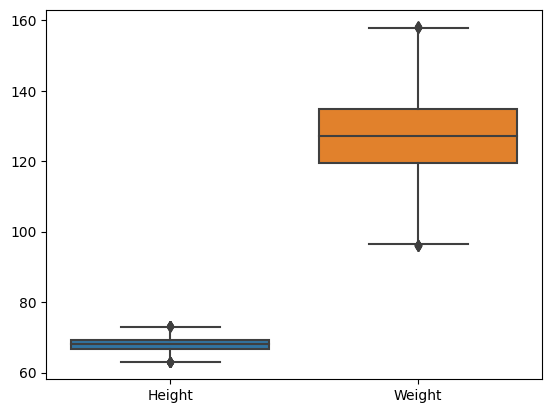

In [79]:
# lets see the outliers now

sbn.boxplot(df[['Height','Weight']])

# we have successfully removed the outliers

<Axes: >

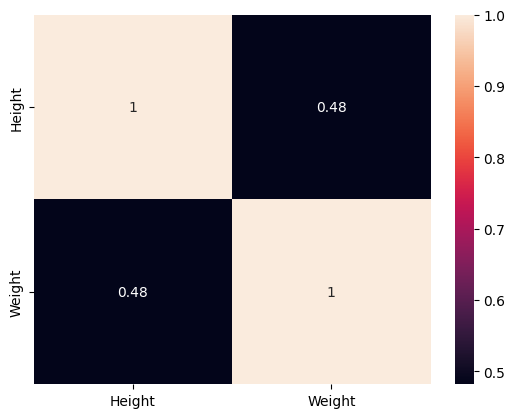

In [80]:
# lets see correlation between height and weight

sbn.heatmap(df[['Height','Weight']].corr(),annot= True)

# we can see there is a possitive correlation between weight and height

In [81]:
# Divide Dataset into independent and dependent feautures
X = df[['Weight']] ## independent feature
y= df[['Height']] ## dependent features

In [82]:
X.shape

(24657, 1)

In [83]:
X

Weight
0      112.9925
1      136.4873
2      153.0269
3      142.3354
4      144.2971
...         ...
24995  118.0312
24996  120.1932
24997  118.2655
24998  132.2682
24999  124.8742

[24657 rows x 1 columns]

In [84]:
y.shape

(24657, 1)

In [85]:
y

Height
0      65.78331
1      71.51521
2      69.39874
3      68.21660
4      67.78781
...         ...
24995  69.50215
24996  64.54826
24997  64.69855
24998  67.52918
24999  68.87761

[24657 rows x 1 columns]

In [86]:
# Divide dataset into train and test

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [87]:
X_train.shape,X_test.shape

((19725, 1), (4932, 1))

In [88]:
y_train.shape,y_test.shape

((19725, 1), (4932, 1))

In [89]:
# Do Standard scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()



In [90]:
X_train = scaler.fit_transform(X_train)

In [91]:
X_train

array([[ 0.16060546],
       [-1.50422516],
       [ 0.51915359],
       ...,
       [ 1.14377951],
       [ 0.30818645],
       [-0.43268739]])

In [92]:
X_test = scaler.transform(X_test)

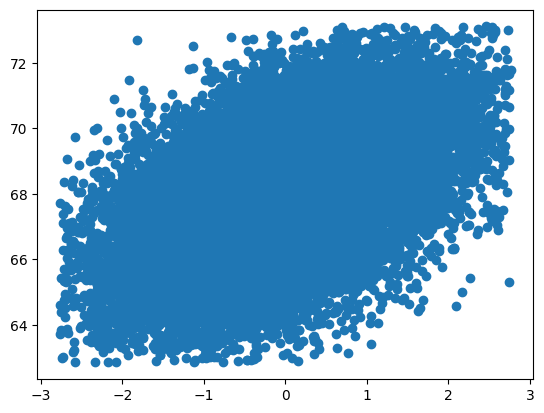

In [93]:
plt.scatter(X_train,y_train)

In [94]:
# model training
from sklearn.linear_model import LinearRegression

In [95]:
regressor = LinearRegression()

In [96]:
regressor.fit(X_train,y_train)

LinearRegression()

In [97]:
# this is theta0
regressor.intercept_

array([67.99592699])

In [98]:
# thsis is theta1
regressor.coef_

array([[0.87909434]])

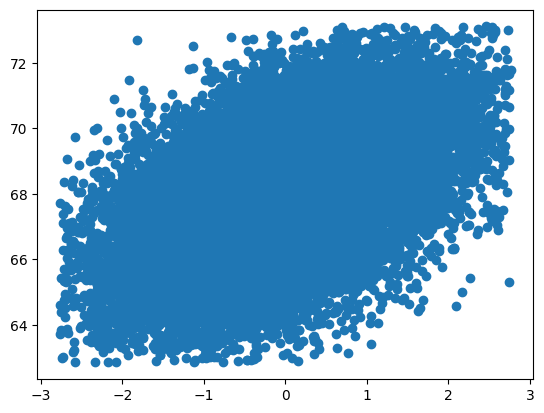

In [99]:
plt.scatter(X_train,y_train)

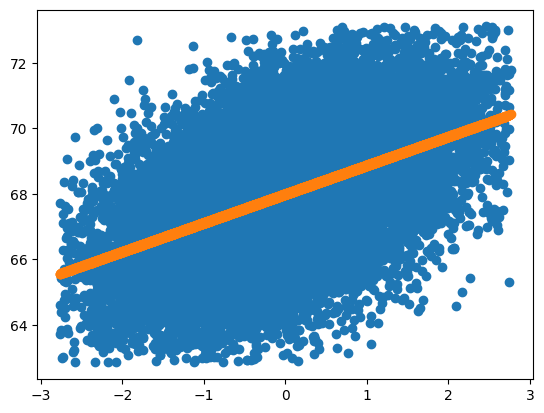

In [110]:
plt.scatter(X_train,y_train)
plt.scatter(X_train,regressor.predict(X_train))

In [101]:
# prediction for test data

y_pred_test = regressor.predict(X_test)

In [102]:
y_pred_test

array([[68.13595785],
       [68.98342902],
       [67.36405692],
       ...,
       [69.45211916],
       [68.62837943],
       [68.33881207]])

In [103]:
y_test

Height
20521  69.72279
16809  69.59150
7238   68.23983
23794  66.78068
19841  66.45283
...         ...
3031   71.21679
23238  69.16742
14308  69.19577
17248  68.48654
1579   70.36596

[4932 rows x 1 columns]

In [104]:
# performance metrics : MAE,MSE,RMSE

from sklearn.metrics import mean_squared_error,mean_absolute_error


In [105]:
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rsme = np.sqrt(mse)
print(mse)
print(mae)
print(rsme)

2.59348794819154
1.2905690460959827
1.6104309821260705


In [106]:
# calculate r square
from sklearn.metrics import r2_score

In [107]:
score = r2_score(y_test,y_pred_test)
score

0.24479234869225341

In [108]:
# Adjusted R Square

1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)



0.24463916255608553

In [109]:
# 24% accuracy